In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
netflix_country = pd.read_csv("Resources/netflix_country.csv")
h_df = pd.read_csv('Resources/happiness_index_2021.csv')

In [3]:
h_df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [4]:
amt_titles_Netflix_df = netflix_country.groupby('Country Availability')['Title'].nunique()

In [5]:
happy_index = h_df[['Country name', 'Ladder score','Regional indicator']]
happy_index.rename(columns={'Country name':'Country Availability'}, inplace=True)


In [6]:
df = pd.merge(amt_titles_Netflix_df,happy_index, on='Country Availability', how='inner').sort_values('Title',ascending=False).set_index('Country Availability')
df

,Title,Ladder score,Regional indicator
Country Availability,,,
United Kingdom,3861,7.064,Western Europe
Czech Republic,3785,6.965,Central and Eastern Europe
Japan,3738,5.940,East Asia
Hungary,3690,5.992,Central and Eastern Europe
Canada,3665,7.103,North America and ANZ
India,3627,3.819,South Asia
Singapore,3619,6.377,Southeast Asia
Thailand,3596,5.985,Southeast Asia
Romania,3591,6.140,Central and Eastern Europe


In [8]:
slope, intercept, r, p, std = st.linregress(df['Title'],df['Ladder score'])
fit = slope*df['Title']+intercept
r

0.053325992527467905

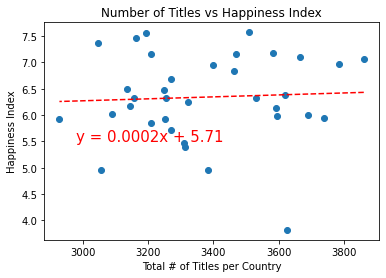

In [18]:
x = df.loc[:,'Title']
y = df.loc[:,'Ladder score']
plt.scatter(x,y)
plt.plot(x, fit, "--", color='r')
text = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.annotate(text,(2980,5.5),fontsize=15, color="r")
plt.title('Number of Titles vs Happiness Index')
plt.xlabel('Total # of Titles per Country')
plt.ylabel('Happiness Index')
plt.savefig("Images/Title_HI.png", facecolor='w')
plt.show()

In [ ]:
df.plot(y='Title',kind='bar',figsize=(20,10))